In [19]:
# standards
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# deep learning
from keras import models, layers

from sklearn.preprocessing import MinMaxScaler

# learn process visualition
from livelossplot.inputs.tf_keras import PlotLossesCallback
from livelossplot import PlotLosses
from livelossplot.outputs import MatplotlibPlot

In [2]:
samples = np.array([[i, i**2] for i in range(50)])

In [3]:
validation_samples = samples[4::5]

In [4]:
validation_samples.shape

(10, 2)

In [5]:
validation_samples

array([[   4,   16],
       [   9,   81],
       [  14,  196],
       [  19,  361],
       [  24,  576],
       [  29,  841],
       [  34, 1156],
       [  39, 1521],
       [  44, 1936],
       [  49, 2401]])

In [6]:
train_samples = np.vstack([samples[i] for i in range(len(samples)) if (i + 1) % 5 != 0])
train_samples = np.vstack([np.array([train_samples[i: i + 4]]) for i in range(0, len(train_samples), 4)])

In [7]:
train_samples.shape

(10, 4, 2)

In [8]:
train_samples

array([[[   0,    0],
        [   1,    1],
        [   2,    4],
        [   3,    9]],

       [[   5,   25],
        [   6,   36],
        [   7,   49],
        [   8,   64]],

       [[  10,  100],
        [  11,  121],
        [  12,  144],
        [  13,  169]],

       [[  15,  225],
        [  16,  256],
        [  17,  289],
        [  18,  324]],

       [[  20,  400],
        [  21,  441],
        [  22,  484],
        [  23,  529]],

       [[  25,  625],
        [  26,  676],
        [  27,  729],
        [  28,  784]],

       [[  30,  900],
        [  31,  961],
        [  32, 1024],
        [  33, 1089]],

       [[  35, 1225],
        [  36, 1296],
        [  37, 1369],
        [  38, 1444]],

       [[  40, 1600],
        [  41, 1681],
        [  42, 1764],
        [  43, 1849]],

       [[  45, 2025],
        [  46, 2116],
        [  47, 2209],
        [  48, 2304]]])

In [10]:
def validation_generator(validation_samples):
    for i in range(len(validation_samples)):
        X = validation_samples[i, 0]
        y = validation_samples[i, 1]
        print('val', X)
        yield (X.reshape(-1, 1), y.reshape(-1, 1))
        
        
def train_generator(train_samples):
    for i in range(len(train_samples)):
        X = train_samples[i, 0]
        y = train_samples[i, 1]
        print('train', X)
        yield (X.reshape(-1, 1), y.reshape(-1, 1))
        

In [11]:
# Load dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow

        
# Create the model
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse',
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['mae'])

model.fit(
    train_generator(train_samples),
    steps_per_epoch=1,
    validation_data=validation_generator(validation_samples),
    validation_steps=1,
    epochs=10,
)

train [0 0]
Epoch 1/10
train [ 5 25]
1/1 [==============================] - ETA: 0s - loss: 1.0000 - mae: 1.0000val 4
val 9
1/1 [==============================] - 0s 151ms/step - loss: 1.0000 - mae: 1.0000 - val_loss: 212.4991 - val_mae: 14.5773
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 376.4883 - mae: 15.6678
val 14
val 19
1/1 [==============================] - 0s 39ms/step - loss: 376.4883 - mae: 15.6678 - val_loss: 36472.4570 - val_mae: 190.9776
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 3652.3362 - mae: 46.2785[ 15 225]
val 24
val 29
1/1 [==============================] - 0s 33ms/step - loss: 3652.3362 - mae: 46.2785 - val_loss: 321854.0000 - val_mae: 567.3218
Epoch 4/10
train [ 20 400]
1/1 [==============================] - ETA: 0s - loss: 15313.7422 - mae: 92.6307val 34
val 39
1/1 [==============================] - 0s 35ms/step - loss: 15313.7422 - mae: 92.6307 - val_loss: 1307839.8750 - val_mae: 1143.6083
Epoch 5/10
train [ 25 625]


In [30]:
plotlosses = PlotLosses()

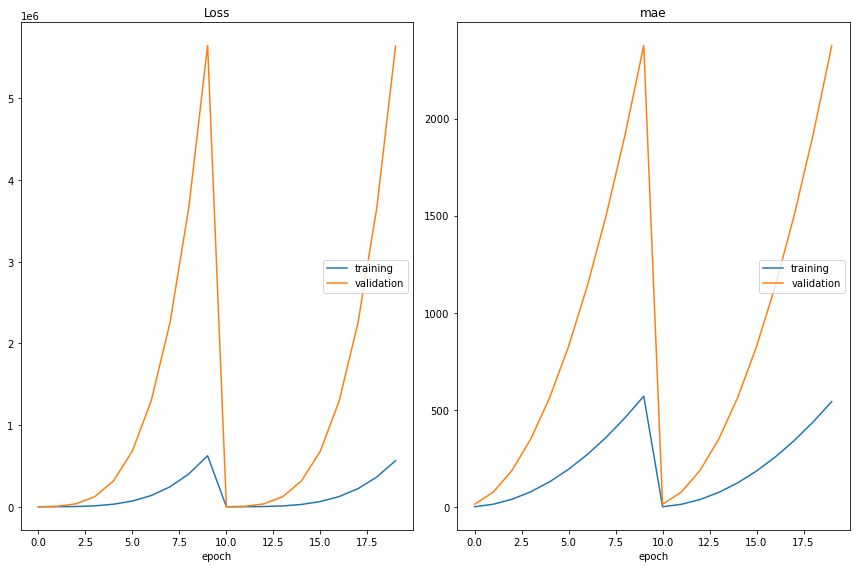

Loss
	training         	 (min:    0.803, max: 624233.375, cur: 564409.312)
	validation       	 (min:  192.529, max: 5647913.500, cur: 5641501.500)
mae
	training         	 (min:    0.896, max:  570.392, cur:  542.333)
	validation       	 (min:   13.875, max: 2376.534, cur: 2375.185)


In [32]:
for train, validation in zip(train_generator(train_samples), validation_generator(validation_samples)):
    X, y = train
    history = model.fit(
        X, 
        y,
        validation_data=validation,
    )

    print(history.history)
    unpacked_history = {
        key: value[0]
        for key, value in history.history.items()
    }
    
    
    plotlosses.update(unpacked_history)
    plotlosses.send()  # draw, update logs, etc


In [ ]:
import math

# deep learning
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# standards
import numpy as np
import pandas as pd

In [ ]:
class DataSequence(Sequence):
    def __init__(self, x_set, y_set, train_size, validation_size):
        self.x_set, self.y_set = x_set, y_set
        self.train_size = train_size
        self.validation_size = validation_size
        self.batch_size = train_size + validation_size

    def __len__(self):
        return math.ceil(len(self.x_set) / self.batch_size)

    def __getitem__(self, index):
        min_bound, max_bound = self.get_bounds(index)
        batch_x = self.x_set[min_bound: max_bound]
        batch_y = self.y_set[min_bound: max_bound]
        print(batch_x)
        return self._reshape(batch_x), self._reshape(batch_y)
    
    def _reshape(self, batch):
        return batch.reshape(-1, 1)
    
    def get_bounds(self, index):
        raise NotImplemented()
        

class TrainDataSequence(DataSequence):
    def get_bounds(self, index):
        min_bound = index * self.batch_size
        max_bound = index * self.batch_size + self.train_size
        print('train', index)
        return min_bound, max_bound
    
    
class ValidationDataSequence(DataSequence):
    def get_bounds(self, index):
        print('val', index)
        min_bound = index * self.batch_size + self.train_size
        max_bound = index * self.batch_size + self.batch_size
        return min_bound, max_bound


In [ ]:
class ValidationDataSequence(Sequence):
    def __init__(self, x_set, y_set, train_size, validation_size):
        self.x_set, self.y_set = x_set, y_set
        self.train_size = train_size
        self.validation_size = validation_size
        self.batch_size = train_size + validation_size

    def __len__(self):
        return math.ceil(len(self.x_set) / self.batch_size)

    def __getitem__(self, index):
        min_bound, max_bound = self.get_bounds(index)
        batch_x = self.x_set[min_bound: max_bound]
        batch_y = self.y_set[min_bound: max_bound]
        print('val', batch_x)
        return self._reshape(batch_x), self._reshape(batch_y)
    
    def _reshape(self, batch):
        return batch.reshape(-1, 1)
    
    def get_bounds(self, index):
        min_bound = index * self.batch_size + self.train_size
        max_bound = index * self.batch_size + self.batch_size
        return min_bound, max_bound
        
        
class TrainDataSequence(Sequence):
    def __init__(self, x_set, y_set, train_size, validation_size):
        self.x_set, self.y_set = x_set, y_set
        self.train_size = train_size
        self.validation_size = validation_size
        self.batch_size = train_size + validation_size

    def __len__(self):
        return math.ceil(len(self.x_set) / self.batch_size)

    def __getitem__(self, index):
        min_bound, max_bound = self.get_bounds(index)
        batch_x = self.x_set[min_bound: max_bound]
        batch_y = self.y_set[min_bound: max_bound]
        print('train', batch_x)
        return self._reshape(batch_x), self._reshape(batch_y)
    
    def _reshape(self, batch):
        return batch.reshape(-1, 1)
    
    def get_bounds(self, index):
        min_bound = index * self.batch_size
        max_bound = index * self.batch_size + self.train_size
        return min_bound, max_bound

In [ ]:
df = pd.DataFrame({'x': [i for i in range(50)], 'y': [i**2 for i in range(50)]})
df = df.values
X, y = df[:,0], df[:,1]

In [ ]:
num_rows = len(df)
validate_size = 1
train_size = 4
batch_size = validate_size + train_size
steps_per_epoch = 1
epochs = num_rows // batch_size // steps_per_epoch

In [ ]:
validation_generator = ValidationDataSequence(
    x_set=X, y_set=y, train_size=train_size, validation_size=validate_size
)

train_generator = TrainDataSequence(
    x_set=X, y_set=y, train_size=train_size, validation_size=validate_size
)

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse',
              optimizer=Adam(),
              metrics=['mae'])


model.fit(
    train_generator,
    steps_per_epoch=1,
    validation_data=validation_generator,
    validation_steps=1,
    epochs=10,
    max_queue_size=1,
    workers=0,
    use_multiprocessing=False,
)